In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
import matplotlib.pyplot as plt

# Part 1: Fetching Stock Data and Getting Returns

In [ ]:
def fetch_stock_data(ticker_list, years=5, year_end=None):
    if year_end is None:
        year_end = datetime.now().year

    end_date = datetime(year_end, 12, 31)
    start_date = end_date - timedelta(days=years * 365)

    close_data_df = pd.DataFrame()
    open_data_df = pd.DataFrame()

    for ticker in ticker_list:
        stock = yf.Ticker(ticker)
        hist_data = stock.history(period='1d', start=start_date, end=end_date)

        # Close Data
        close_data = hist_data['Close'].rename(ticker)
        close_data_df = pd.merge(close_data_df, pd.DataFrame(close_data), left_index=True, right_index=True, how='outer')

        # Open Data
        open_data = hist_data['Open'].rename(ticker)
        open_data_df = pd.merge(open_data_df, pd.DataFrame(open_data), left_index=True, right_index=True, how='outer')

    return close_data_df, open_data_df

# Fetch the data
ticker_list = [
    'AAPL', 'ABBV', 'AMGN', 'AMZN', 'AXP', 'BA', 'BIIB', 'BMY', 'CAT', 'CMCSA', 'CSCO', 'CVX', 'DD', 'DIS', 'F', 'GE', 'GILD', 'GM', 'GOOGL',
    'GS', 'HD', 'HON', 'IBM', 'INTC', 'JCI', 'JNJ', 'JPM', 'KO', 'MCD', 'META', 'MMM', 'MRK', 'MSFT', 'PEP', 'PFE', 'PG', 'T', 'TSLA', 'UNH', 'V',
    'VZ', 'WMT', 'XOM'
]

years = 5
year_end = 2022

close, open = fetch_stock_data(ticker_list, years, year_end)
close.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.722874,74.990402,147.573792,59.450500,90.506485,282.886444,334.170013,50.243568,135.989395,35.741459,...,99.192345,27.571007,77.153877,18.058535,21.368668,202.505447,109.938278,39.690189,88.623238,63.220615
2018-01-03 00:00:00-05:00,40.715778,76.163902,150.358536,60.209999,91.064491,283.801331,339.850006,50.284542,136.197205,35.167076,...,98.931892,27.775291,77.060249,17.641506,21.150000,204.629791,111.032761,38.874577,89.396324,64.462273
2018-01-04 00:00:00-05:00,40.904919,75.729561,149.724930,60.479500,92.579193,282.724426,339.989990,50.936192,138.067719,35.393356,...,99.419197,27.835821,77.604973,17.805504,20.974667,205.517960,111.445572,39.000622,89.477211,64.551468
2018-01-05 00:00:00-05:00,41.370617,77.047859,150.617020,61.457001,92.790321,294.322327,342.489990,51.051674,140.249893,35.715343,...,99.704865,27.888790,77.656029,17.871103,21.105333,209.436951,114.114594,38.911652,90.007545,64.499428
2018-01-08 00:00:00-05:00,41.216953,75.813370,150.575348,62.343498,91.936607,295.570709,329.649994,51.068169,143.774368,35.228016,...,99.133537,27.578573,78.064568,17.922646,22.427334,205.801819,114.575424,38.844921,91.337952,64.789398


In [ ]:
open.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.226428,74.022633,146.198109,58.599998,91.229147,281.847685,321.149994,50.317324,137.080506,35.558706,...,100.763495,27.525609,78.234795,18.302189,20.799999,202.377257,109.995880,39.415851,89.261468,62.320970
2018-01-03 00:00:00-05:00,40.786700,75.097079,147.498778,59.415001,90.780911,282.028777,333.459991,50.161616,135.989371,35.462964,...,99.066325,27.578570,77.221964,18.025730,21.400000,202.926679,110.360703,39.519643,88.856981,63.317273
2018-01-04 00:00:00-05:00,40.789080,76.255357,150.600370,60.250000,91.826442,283.934717,339.730011,50.317533,136.725487,35.219308,...,98.973900,27.775292,77.307083,17.688362,20.858000,205.417237,111.608783,38.830087,89.477211,64.529164
2018-01-05 00:00:00-05:00,41.001828,75.699080,150.775434,60.875500,92.579181,282.819695,342.000000,51.035176,138.777761,35.602209,...,99.486421,27.858524,77.681561,17.871103,21.108000,206.195551,112.319249,39.148918,89.567083,64.499428
2018-01-08 00:00:00-05:00,41.216953,77.177386,150.475289,61.799999,92.716897,294.150759,341.450012,50.960934,142.111738,35.480391,...,99.318379,27.782860,77.392183,17.875789,21.066668,208.887574,113.874573,38.970970,90.115437,64.462252


In [ ]:
def generate_returns(prices, shift):
    return_prices = prices.pct_change(shift).iloc[shift:, :]
    return return_prices

returns = generate_returns(close, 1)
returns.head()

,AAPL,ABBV,AMGN,AMZN,AXP,BA,BIIB,BMY,CAT,CMCSA,...,PEP,PFE,PG,T,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00-05:00,-0.000174,0.015649,0.018870,0.012775,0.006165,0.003234,0.016997,0.000816,0.001528,-0.016070,...,-0.002626,0.007409,-0.001214,-0.023093,-0.010233,0.010490,0.009955,-0.020549,0.008723,0.019640
2018-01-04 00:00:00-05:00,0.004645,-0.005703,-0.004214,0.004476,0.016633,-0.003795,0.000412,0.012959,0.013734,0.006434,...,0.004926,0.002179,0.007069,0.009296,-0.008290,0.004340,0.003718,0.003242,0.000905,0.001384
2018-01-05 00:00:00-05:00,0.011385,0.017408,0.005958,0.016163,0.002281,0.041022,0.007353,0.002267,0.015805,0.009097,...,0.002873,0.001903,0.000658,0.003684,0.006230,0.019069,0.023949,-0.002281,0.005927,-0.000806
2018-01-08 00:00:00-05:00,-0.003714,-0.016022,-0.000277,0.014425,-0.009200,0.004242,-0.037490,0.000323,0.025130,-0.013645,...,-0.005730,-0.011123,0.005261,0.002884,0.062638,-0.017357,0.004038,-0.001715,0.014781,0.004496
2018-01-09 00:00:00-05:00,-0.000115,0.007539,0.015393,0.004676,0.003694,0.026697,0.020355,-0.000969,0.002409,0.003211,...,0.000763,-0.001097,-0.007305,-0.002607,-0.008085,0.004983,-0.001927,-0.003668,-0.012007,-0.004246


# Part 2: Statistical Risk Model

## A. Fit PCA

PCA is a dimensionality reduction technique that transforms data into a new coordinate system to capture its main patterns or features while discarding information from the old axes.

In [ ]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    return pca.fit(returns)

num_factor_exposures = 20
pca = fit_pca(returns, num_factor_exposures, 'full')

The `pca.explained_variance_ratio_` represents the proportion of variance explained by each principal component.

<BarContainer object of 20 artists>

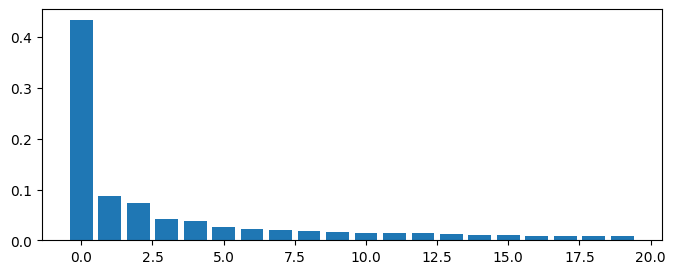

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_)

## B. Factor Betas

Factor beta represents the sensitivity of each factor to the principal components obtained from PCA.

In [ ]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    factor_betas = pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)

    return factor_betas

risk_model = {}
risk_model['factor_betas'] = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))

## C. Factor Returns

Factor returns show the real impact of these sensitivities on the portfolio's performance.

In [ ]:
def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    factor_returns = pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)
    return factor_returns

risk_model['factor_returns'] = factor_returns(
    pca,
    returns,
    returns.index,
    np.arange(num_factor_exposures))

## D. Factor Covariance Matrix

In [ ]:
def factor_cov_matrix(factor_returns, ann_factor):
    factor_cov_matrix = np.var(factor_returns, ddof=1)
    factor_cov_matrix = np.diag(factor_cov_matrix) * ann_factor
    return factor_cov_matrix

ann_factor = 252 # Annualization factor
risk_model['factor_cov_matrix'] = factor_cov_matrix(risk_model['factor_returns'], ann_factor)

## E. Idiosyncratic Variance Matrix

It quantifies the asset-specific risk that is not explained by the common factors represented by `factor_returns` and `factor_betas`.

In [ ]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    dot_product = np.dot(factor_returns, factor_betas.T)
    common_return = pd.DataFrame(dot_product, returns.index, returns.columns)
    residual_return = returns - common_return

    idiosyncratic_var_matrix = pd.DataFrame(np.diag(np.var(residual_return)) * ann_factor, returns.columns, returns.columns)

    return idiosyncratic_var_matrix

risk_model['idiosyncratic_var_matrix'] = idiosyncratic_var_matrix(returns, risk_model['factor_returns'], risk_model['factor_betas'], ann_factor)

## F. Idiosyncratic Variance Vector

In [ ]:
def idiosyncratic_var_vector(returns, idiosyncratic_var_matrix):
    idiosyncratic_var_vector = pd.DataFrame(np.diagonal(idiosyncratic_var_matrix), returns.columns)

    return idiosyncratic_var_vector

risk_model['idiosyncratic_var_vector'] = idiosyncratic_var_vector(returns, risk_model['idiosyncratic_var_matrix'])

## G. Predict using the Risk Model

The function `predict_portfolio_risk` calculates the predicted risk of a portfolio by combining factor-based and idiosyncratic risks, outputting a single number that represents the standard deviation of portfolio returns, thus quantifying overall portfolio risk.

That is the formula to predict the portfolio risk $ \sqrt{X^{T}(BFB^{T} + S)X} $ where:
- $ X $ is the portfolio weights
- $ B $ is the factor betas
- $ F $ is the factor covariance matrix
- $ S $ is the idiosyncratic variance matrix

In [ ]:
def predict_portfolio_risk(factor_betas, factor_cov_matrix, idiosyncratic_var_matrix, weights):
    form_break_01 = np.dot(np.dot(factor_betas, factor_cov_matrix), factor_betas.T) + idiosyncratic_var_matrix # (BFB.T + S)
    form_break_02 = np.dot(np.dot(weights.T, form_break_01), weights) # (X.T(form_break_01)X)

    predicted_portfolio_risk = np.sqrt(form_break_02)

    return predicted_portfolio_risk[0][0]

all_weights = pd.DataFrame(np.repeat(1/len(ticker_list), len(ticker_list)), ticker_list)

predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)

0.21047918539220473